In [3]:
from numpy import linspace, sin, cos, exp, pi
import numpy as np
import matplotlib.pyplot as plt
π = pi

In [4]:
# Set up some parameters
FREQ = 10 # Desired Frequency in Hz
OMEGA = ω = 2*π*FREQ
PHASE = 0
FS = 4096 # FS = 4096 = Analog-digital-converter sampling at 4096 Hz
N = 1024 # number of DFT points

In [5]:
t = linspace(0,1,FS) 

In [6]:
complexWave = exp(1j * ω * t + PHASE) # This is equivalent to [ cos(ωt)+ -1jSin(ωt) ]
cW = complexWave

**Lets make a plot!**

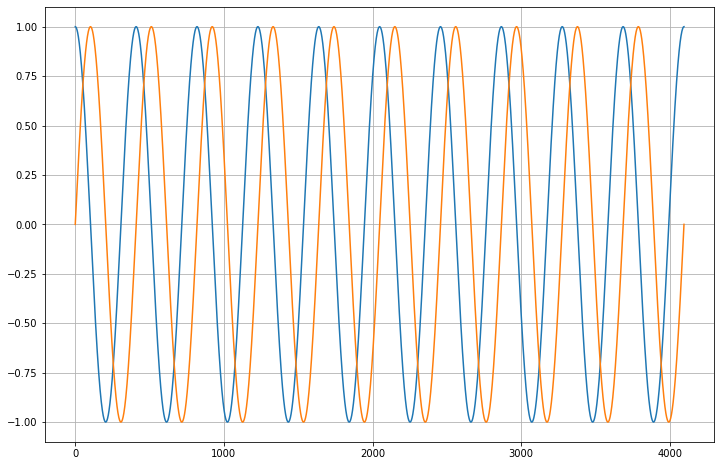

In [7]:
plt.figure(figsize=(12,8))
plt.plot(complexWave.real)
plt.plot(complexWave.imag)
# plt.xlim(-10,100)
plt.grid()
plt.show()

### Discrete Fourier Transform
_"Understanding Digital Signal Processing", RICHARD G LYONS: Chapter 3_


In [8]:
# My signal above has an FS of 
print("{} Hz".format(FS))

4096 Hz


In [9]:
# When I decide how many points my DFT will have or 'N'.
# This will result in the dft haveing fundamental frequency of FS/N
FF = FS/N
print("{} Hz".format(FF))

# it will divide my space up into 4 Hz Increments

4.0 Hz


### DFT Equation
$ X(m) = \sum_{n=0}^{N-1}x(n)e^{-j2\pi nm/N} $ 

Which is equivalent to

$ X(m) = \sum_{n=0}^{N-1}x(n)[cos(2\pi nm / N) -1jsin(2\pi nm / N)]) $

From Euler's relationship

In [16]:
def dftEQ1(ts, nPoints):
    bigX = []
    for m in range(nPoints):
        x = 0
        for n in range(nPoints):
            x = x + ts[n] * exp(-1j*2*pi*n*m / nPoints)
        bigX.append(x)
    print("Analaysus Frequency = {} Hz".format(FS/nPoints))
    return np.array(bigX)

def dftEQ2(ts, nPoints):
    bigX = []
    for m in range(nPoints):
        x = 0
        for n in range(nPoints):
            x = x + (ts[n]*cos((2*pi*n*m)/nPoints)) - (1j*ts[n]*(sin((2*pi*n*m)/nPoints)))
        bigX.append(x)
    print("Analaysus Frequency = {} Hz".format(FS/nPoints))
    return np.array(bigX)

In [19]:
result = dftEQ2(cW, FS)

Analaysus Frequency = 1.0 Hz


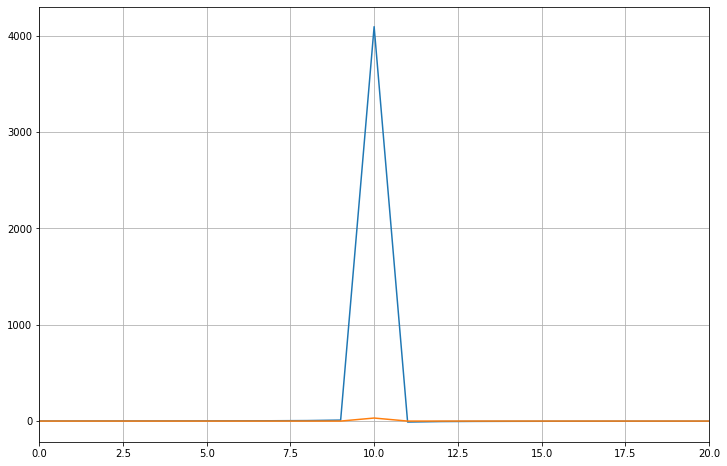

In [20]:
plt.figure(figsize=(12,8))
plt.plot(result.real)
plt.plot(result.imag)
plt.xlim(0, 20)
plt.grid()
plt.show()